In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Built-in Modules
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pickle
from ml_war_machine.feature_engineering import feature_engineering as fe
from ml_war_machine.machine_learning import feature_selection as fs
from ml_war_machine.statistical_analysis import statistical_analysis as statistical_analysis

# Ignore Python package warnings (not verbose)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# paths
DIRECTORY_PATH = os.path.dirname(os.getcwd())
os.chdir(DIRECTORY_PATH)

DATA_PATH   = os.path.join(os.getcwd(), "data", "input")
RESULT_PATH = os.path.join(os.path.dirname(os.getcwd()), "results")
MODEL_PATH  = os.path.join(os.getcwd(), "models")
target = "deaths"

In [3]:
# experiment name
EXPERIMENT_FOLDER = "02 - Data Analysis"
try: 
    assert os.path.exists(os.path.join(RESULT_PATH, EXPERIMENT_FOLDER))
except AssertionError:
    os.makedirs(os.path.join(RESULT_PATH, EXPERIMENT_FOLDER))

In [4]:
file = '06_29_2020_states_combined.csv'
df = pd.read_csv(os.path.join(DATA_PATH, file), parse_dates=["date"], index_col=[0])

# Exception
df = df[df["state"]!='Guam']
df = df[df["state"]!='Northern Mariana Islands']
df = df[df["state"]!='Puerto Rico']
df = df[df["state"]!='Diamond Princess']
df = df[df["state"]!='Grand Princess']
df = df[df["state"]!='American Samoa']
df = df[df["state"]!='Virgin Islands']

df.sort_values(["state", "date"], inplace=True)

In [5]:
df.head()

,state,date,cases,deaths,population,emergdec,schoolclose,gathrestrict25,gathrestrictany,otherbusinessclose,...,workplaces,residential,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,testing_rate,hospitalization_rate
0,Alabama,2020-01-22,0,0,4903185.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2020-01-23,0,0,4903185.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2020-01-24,0,0,4903185.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2020-01-25,0,0,4903185.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2020-01-26,0,0,4903185.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df["cases_nom"] = df["cases"] / df["population"]
df["deaths_nom"] = df["deaths"] / df["population"]

In [7]:
for columns in df.columns :
    print("column name : {} - {} NaN".format(columns, df[columns].isnull().mean()))
    
print(df.isnull().mean().mean())

column name : state - 0.0 NaN
column name : date - 0.0 NaN
column name : cases - 0.0 NaN
column name : deaths - 0.0 NaN
column name : population - 0.0 NaN
column name : emergdec - 0.0 NaN
column name : schoolclose - 0.0 NaN
column name : gathrestrict25 - 0.0 NaN
column name : gathrestrictany - 0.0 NaN
column name : otherbusinessclose - 0.0 NaN
column name : restaurantrestrict - 0.0 NaN
column name : gathrestrict10 - 0.0 NaN
column name : caseisolation - 0.0 NaN
column name : stayathome - 0.0 NaN
column name : publicmask - 0.0 NaN
column name : quarantine - 0.0 NaN
column name : nebusinessclose - 0.0 NaN
column name : travelrestrictintra - 0.0 NaN
column name : gathrestrict50 - 0.0 NaN
column name : gathrecomany - 0.0 NaN
column name : gathrestrict250 - 0.0 NaN
column name : gathrestrict5 - 0.0 NaN
column name : gathrestrict100 - 0.0 NaN
column name : gathrestrict1000 - 0.0 NaN
column name : gathrestrict3 - 0.0 NaN
column name : travelrestrictexit - 0.0 NaN
column name : travelrestricte

In [8]:
df = df.loc[:, df.isnull().mean() < 0.25]
df.shape

(8058, 36)

In [9]:
col_to_keep = set(df.columns.tolist())

In [10]:
df.columns.tolist()

['state',
 'date',
 'cases',
 'deaths',
 'population',
 'emergdec',
 'schoolclose',
 'gathrestrict25',
 'gathrestrictany',
 'otherbusinessclose',
 'restaurantrestrict',
 'gathrestrict10',
 'caseisolation',
 'stayathome',
 'publicmask',
 'quarantine',
 'nebusinessclose',
 'travelrestrictintra',
 'gathrestrict50',
 'gathrecomany',
 'gathrestrict250',
 'gathrestrict5',
 'gathrestrict100',
 'gathrestrict1000',
 'gathrestrict3',
 'travelrestrictexit',
 'travelrestrictentry',
 'gathrestrict500',
 'retail_and_recreation',
 'grocery_and_pharmacy',
 'parks',
 'transit_stations',
 'workplaces',
 'residential',
 'cases_nom',
 'deaths_nom']

In [11]:
col_to_diff = set([
    # 'emergdec', # bool
    # 'schoolclose', # bool
    # 'gathrestrict25', # bool
    # 'gathrestrictany', # bool
    # 'otherbusinessclose' # bool # interesting,
    # 'restaurantrestrict',  # bool
    # 'gathrestrict10',  # bool # gathrestrict10
    # 'caseisolation',  # bool
    # 'stayathome',  # bool  # interesting
    # 'publicmask',  # bool # interesting
    # 'quarantine',  # bool # interesting
    # 'nebusinessclose',  # bool # interesting
    # 'travelrestrictintra',  # bool # interesting
    # 'gathrestrict50',  # bool # interesting
    # 'gathrecomany',
    # 'gathrestrict250',
    # 'gathrestrict5',
    # 'gathrestrict1000',
    # 'gathrestrict100',
    # 'gathrestrict3',
    # 'travelrestrictexit',
    # 'travelrestrictentry',
    # 'gathrestrict500',
    'retail_and_recreation',
    'grocery_and_pharmacy',
    'parks',
    'transit_stations',
    'workplaces',  # seasonality?
    'residential',  # seasonality
    
    # #### start too late
    # 'recovered',  
    # 'active',  # start too late
    # 'incident_rate',
    # 'people_tested',
    # 'people_hospitalized',
    # 'mortality_rate',
    # 'testing_rate',
    # 'hospitalization_rate',
    'home_time',
    'percentage',
    'full_time',
    'part_time',
    'non_home_time',
    'distance', 
    'cases_nom',
    'deaths_nom'
    ])

col_to_diff = col_to_diff & col_to_keep

# add differences
df_ = fe.diff(df, col_to_diff, index='state', lags=(1, 2, 5, 10))

In [12]:
col_to_pct = set([
    'deaths',
    'cases',
    'retail_and_recreation',
    'grocery_and_pharmacy',
    'parks',
    'transit_stations',
    'workplaces',  # seasonality?
    'residential',  # seasonality
    'home_time',
    'percentage',
    'full_time',
    'part_time',
    'non_home_time',
    'distance', 
    ])

col_to_pct = col_to_pct & col_to_keep

# add percentage changes
df = fe.pct(df, col_to_pct, index='state', lags=(1, 2, 5, 10))

In [13]:
col_to_ma = set([
    'retail_and_recreation',
    'grocery_and_pharmacy',
    'parks',
    'transit_stations',
    'workplaces',  # seasonality?
    'residential',  # seasonality
    'home_time',
    'percentage',
    'full_time',
    'part_time',
    'non_home_time',
    'distance', 
    'cases_nom',
    'deaths_nom'
    ])

col_to_ma = col_to_ma & col_to_keep
# add pct
col_to_ma = set([col+ "_pct1" for col in col_to_ma])

# add moving average
df = fe.ma_mean(df, col_to_ma, index='state', periods=(1, 2, 7, 10))

In [14]:
col_to_lag = set(df.columns) - {'state', 'date', 'population'}
df = fe.lag(df, col_to_lag, index='state', nb_lag=5)

485it [00:20, 23.27it/s]


In [15]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df = df.loc[:, df.isnull().mean() < 0.1]
df.shape

(8058, 585)

In [16]:
for columns in df.columns :
    print("column name : {} - {} NaN".format(columns, df[columns].isnull().mean()))
    
print(df.isnull().mean().mean())

column name : state - 0.0 NaN
column name : date - 0.0 NaN
column name : cases - 0.0 NaN
column name : deaths - 0.0 NaN
column name : population - 0.0 NaN
column name : emergdec - 0.0 NaN
column name : schoolclose - 0.0 NaN
column name : gathrestrict25 - 0.0 NaN
column name : gathrestrictany - 0.0 NaN
column name : otherbusinessclose - 0.0 NaN
column name : restaurantrestrict - 0.0 NaN
column name : gathrestrict10 - 0.0 NaN
column name : caseisolation - 0.0 NaN
column name : stayathome - 0.0 NaN
column name : publicmask - 0.0 NaN
column name : quarantine - 0.0 NaN
column name : nebusinessclose - 0.0 NaN
column name : travelrestrictintra - 0.0 NaN
column name : gathrestrict50 - 0.0 NaN
column name : gathrecomany - 0.0 NaN
column name : gathrestrict250 - 0.0 NaN
column name : gathrestrict5 - 0.0 NaN
column name : gathrestrict100 - 0.0 NaN
column name : gathrestrict1000 - 0.0 NaN
column name : gathrestrict3 - 0.0 NaN
column name : travelrestrictexit - 0.0 NaN
column name : travelrestricte

column name : stayathome_lag5 - 0.03164556962025317 NaN
column name : parks_diff5_lag1 - 0.21854058078927774 NaN
column name : parks_diff5_lag2 - 0.22114668652271036 NaN
column name : parks_diff5_lag3 - 0.22486969471332838 NaN
column name : parks_diff5_lag4 - 0.227475800446761 NaN
column name : parks_diff5_lag5 - 0.2326880119136262 NaN
column name : grocery_and_pharmacy_pct5_lag1 - 0.22040208488458674 NaN
column name : grocery_and_pharmacy_pct5_lag2 - 0.22635889798957556 NaN
column name : grocery_and_pharmacy_pct5_lag3 - 0.23243981136758501 NaN
column name : grocery_and_pharmacy_pct5_lag4 - 0.23852072474559444 NaN
column name : grocery_and_pharmacy_pct5_lag5 - 0.24472573839662448 NaN
column name : gathrestrict1000_lag1 - 0.006329113924050633 NaN
column name : gathrestrict1000_lag2 - 0.012658227848101266 NaN
column name : gathrestrict1000_lag3 - 0.0189873417721519 NaN
column name : gathrestrict1000_lag4 - 0.02531645569620253 NaN
column name : gathrestrict1000_lag5 - 0.03164556962025317 

column name : travelrestrictintra_lag1 - 0.006329113924050633 NaN
column name : travelrestrictintra_lag2 - 0.012658227848101266 NaN
column name : travelrestrictintra_lag3 - 0.0189873417721519 NaN
column name : travelrestrictintra_lag4 - 0.02531645569620253 NaN
column name : travelrestrictintra_lag5 - 0.03164556962025317 NaN
column name : gathrestrictany_lag1 - 0.006329113924050633 NaN
column name : gathrestrictany_lag2 - 0.012658227848101266 NaN
column name : gathrestrictany_lag3 - 0.0189873417721519 NaN
column name : gathrestrictany_lag4 - 0.02531645569620253 NaN
column name : gathrestrictany_lag5 - 0.03164556962025317 NaN
column name : transit_stations_pct5_lag1 - 0.20501365103003227 NaN
column name : transit_stations_pct5_lag2 - 0.2113427649540829 NaN
column name : transit_stations_pct5_lag3 - 0.21767187887813352 NaN
column name : transit_stations_pct5_lag4 - 0.22387689252916357 NaN
column name : transit_stations_pct5_lag5 - 0.2302060064532142 NaN
column name : retail_and_recreation

0.15614593343558347


In [17]:
df_ = []
days_avg = 3
col_keep = list(set(df.columns) - {'state', 'date'})
start_date = df.date.min()
end_date = df.date.max()

p_date = pd.date_range(start_date, end_date, freq="1D")

for state_name, group in df.groupby("state"):
    group_ = group.set_index("date").reindex(p_date)
    group_ = group_.resample("{}D".format(days_avg)).mean()
    group_["state"] = state_name
    df_.append(group_)
    
df = pd.concat(df_)
df.head()

,cases,deaths,population,emergdec,schoolclose,gathrestrict25,gathrestrictany,otherbusinessclose,restaurantrestrict,gathrestrict10,...,caseisolation_lag2,caseisolation_lag3,caseisolation_lag4,caseisolation_lag5,grocery_and_pharmacy_diff2_lag1,grocery_and_pharmacy_diff2_lag2,grocery_and_pharmacy_diff2_lag3,grocery_and_pharmacy_diff2_lag4,grocery_and_pharmacy_diff2_lag5,state
2020-01-22,0.0,0.0,4903185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,1.000000,1.000000,0.000000,4.0,-18.0,-30.0,5.0,7.0,Alabama
2020-01-25,0.0,0.0,4903185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,Alabama
2020-01-28,0.0,0.0,4903185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,Alabama
2020-01-31,0.0,0.0,4903185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.000000,0.000000,0.000000,7.0,7.0,NaN,NaN,NaN,Alabama
2020-02-03,0.0,0.0,4903185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.333333,0.333333,NaN,NaN,7.0,7.0,7.0,Alabama


In [18]:
target = "deaths"
df["target"] = df["{}_pct1".format(target)].shift(-1)
df.dropna(subset=["target"], inplace=True)
df = df.loc[df.target > 0. , :]
df = df.loc[:, df.isnull().mean() < 0.10].dropna()

y, data = np.log(1e-5+ df["target"]), df.loc[:, df.columns != "target"]
data.drop("state", axis=1, inplace=True)

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                   y, 
                                                   train_size=0.8, 
                                                   shuffle=False, 
                                                   random_state=0)

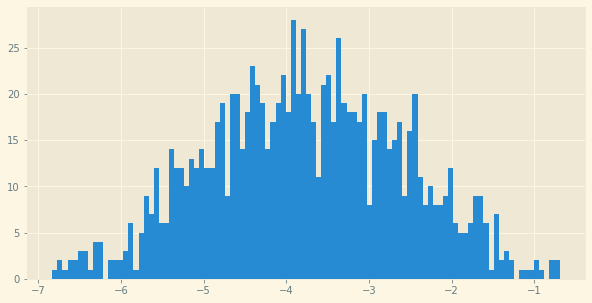

In [20]:
y_train.hist(bins=100)

In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [22]:
hparams =  {
            "alpha": np.logspace(-3, 2., 30),
            "fit_intercept": [True, False],
            "selection": ["cyclic", "random"],
            "max_iter": [100, 500, 1000, 2000],
            }

In [23]:
# scaling
scaler = StandardScaler()
row_names = x_train.index
x_train_sc = pd.DataFrame(data=scaler.fit_transform(x_train), index=row_names)
x_test_sc = scaler.transform(x_test)

# create the model
rclf = RandomizedSearchCV(estimator=Lasso(),
                          param_distributions=hparams,
                          verbose=15, n_iter=100,
                          n_jobs=3,
                          random_state=1234)

rclf.fit(x_train_sc, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    5.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:    5.3s
[Parallel(

[Parallel(n_jobs=3)]: Done 203 tasks      | elapsed:   26.4s
[Parallel(n_jobs=3)]: Batch computation too fast (0.1814s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done 204 tasks      | elapsed:   26.4s
[Parallel(n_jobs=3)]: Done 205 tasks      | elapsed:   26.5s
[Parallel(n_jobs=3)]: Done 206 tasks      | elapsed:   26.5s
[Parallel(n_jobs=3)]: Done 207 tasks      | elapsed:   26.5s
[Parallel(n_jobs=3)]: Done 208 tasks      | elapsed:   26.5s
[Parallel(n_jobs=3)]: Done 209 tasks      | elapsed:   26.5s
[Parallel(n_jobs=3)]: Done 210 tasks      | elapsed:   26.5s
[Parallel(n_jobs=3)]: Done 212 tasks      | elapsed:   26.7s
[Parallel(n_jobs=3)]: Done 214 tasks      | elapsed:   26.8s
[Parallel(n_jobs=3)]: Done 216 tasks      | elapsed:   27.0s
[Parallel(n_jobs=3)]: Done 218 tasks      | elapsed:   27.0s
[Parallel(n_jobs=3)]: Done 220 tasks      | elapsed:   27.1s
[Parallel(n_jobs=3)]: Done 222 tasks      | elapsed:   27.5s
[Parallel(n_jobs=3)]: Done 224 tasks      | elapsed:   27.7s
[Pa

[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:   41.4s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=3,
                   param_distributions={'alpha': array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29...
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02]),
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 500, 1000, 2000],
                           

In [24]:
for col in data.columns[np.abs(rclf.best_estimator_.coef_) > 1e-9]:
    print(col)

cases
publicmask
gathrestrict3
retail_and_recreation
residential
cases_nom
deaths_nom
retail_and_recreation_diff1
residential_diff5
deaths_nom_diff5
cases_nom_diff10
cases_pct1
residential_pct1
deaths_pct1
workplaces_pct1
cases_pct2
residential_pct5
workplaces_pct5
workplaces_pct10
otherbusinessclose_lag4
emergdec_lag1
residential_pct2_lag2
cases_pct2_lag4
deaths_nom_diff1_lag5
parks_pct10_lag5
transit_stations_pct10_lag2
publicmask_lag5
deaths_pct1_lag3
deaths_pct1_lag4
transit_stations_pct1_lag4
travelrestrictintra_lag5
deaths_nom_diff5_lag2
deaths_pct5_lag2
cases_pct1_lag4
cases_pct1_lag5
workplaces_pct5_lag4
grocery_and_pharmacy_pct10_lag1
deaths_pct2_lag1
deaths_pct2_lag2
deaths_pct2_lag5
gathrestrict250_lag2
gathrestrict250_lag4
gathrestrict25_lag3
gathrestrict5_lag2
transit_stations_lag5
deaths_nom_diff10_lag1
workplaces_pct10_lag1


In [25]:
rclf.best_estimator_.sparse_coef_

<1x578 sparse matrix of type '<class 'numpy.float64'>'
	with 47 stored elements in Compressed Sparse Row format>

In [26]:
rclf.best_score_

0.7375048772014564

In [27]:
rclf.score(x_test_sc, y_test)

0.590508654656737